In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('../input/600256_SS.csv')
df2 = pd.read_csv('../input/000001_SS.csv')
df3 = pd.read_csv('../input/399001_SZ.csv')
df4 = pd.read_csv('../input/HSI.csv')
df5 = pd.read_csv('../input/IXIC.csv')
df6 = pd.read_csv('../input/filtered_data_JM0.csv')
df7 = pd.read_csv('../input/FTSE.csv')


C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\2118461891.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('../input/filtered_data_JM0.csv')


In [100]:
import pandas as pd
import glob

csv_files = glob.glob('../input/hahaha/*.csv')

df_base = pd.read_csv(csv_files[0])

for file in csv_files[1:]:
    df_temp = pd.read_csv(file)
    close_column_name = f"{file.split('.')[0]}_Close"
    df_temp.rename(columns={'Close': close_column_name}, inplace=True)
    df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')

df_base.fillna(method='ffill', inplace=True)

output_path = 'output/merged_close.csv'
df_base.to_csv(output_path, index=False)

print(f"文件已保存到 {output_path}")


C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\2896051216.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file)


文件已保存到 output/merged_close.csv


C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\2896051216.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'_Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')
C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\2896051216.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'_Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')


In [103]:
import pandas as pd
import glob

csv_files = glob.glob('../input/hahaha/*.csv')

df_base = pd.read_csv(csv_files[0])

for file in csv_files[1:]:
    df_temp = pd.read_csv(file)

    df_temp['Date'] = pd.to_datetime(df_temp['Date'])
    df_base['Date'] = pd.to_datetime(df_base['Date'])

    close_column_name = f"{file.split('.')[0]}_close"
    df_temp.rename(columns={'Close': close_column_name}, inplace=True)
    df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')

df_base.fillna(method='ffill', inplace=True)

output_path = 'output/merged_close.csv'
df_base.to_csv(output_path, index=False)

print(f"文件已保存到 {output_path}")


C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\3998295029.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file)


文件已保存到 output/merged_close.csv


C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\3998295029.py:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'_close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')
C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\3998295029.py:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'_close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_base = pd.merge(df_base, df_temp[['Date', close_column_name]], on='Date', how='left')


In [96]:
merged_df = pd.merge(df, df2[['Date', 'Close']], on='Date', how='left')
merged_df.rename(columns={'Close': '001_SS_Close'}, inplace=True)

In [97]:
merged_df.head()

,Date,Open,High,Low,Close_x,Adj Close,Volume,Close_y
0,2023-01-03,9.05,9.19,8.88,9.19,7.430150,78542648,3116.510010
1,2023-01-04,9.19,9.21,8.82,8.90,7.195683,146132485,3123.520020
2,2023-01-05,8.90,9.02,8.76,8.99,7.268449,109875948,3155.219971
3,2023-01-06,8.96,9.38,8.95,9.34,7.551425,151722781,3157.639893
4,2023-01-09,9.39,9.57,9.16,9.54,7.713126,127695219,3176.080078


In [72]:
import pandas as pd

df_base = pd.read_csv('output/merged_data_ALL.csv')

df6 = pd.read_csv('../input/filtered_data_JM0.csv')

merged_df = pd.merge(df_base, df6[['Date', 'Close']], on='Date', how='left')


merged_df.rename(columns={'Close': 'JM0_close'}, inplace=True)

merged_df.to_csv('output/merged_600256_000001.csv', index=False)

print("合并完成，文件已保存到output文件夹下的merged_600256_000001.csv")



C:\Users\Sirius\AppData\Local\Temp\ipykernel_34700\1213389145.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv('../input/filtered_data_JM0.csv')


合并完成，文件已保存到output文件夹下的merged_600256_000001.csv


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../input/merged_data_ALL3.csv')
df = df.dropna(axis=0,how='any')

X = df[['001_SS_Close', '399_SZ_Close', 'HIS_Close', 'IXIC_Close', 'FTSE_Close', 'JM0_Close','GDAXI_Close']]
y = df['600_Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [105]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso回归的均方误差:", mean_squared_error(y_test, y_pred_lasso))


Lasso回归的均方误差: 0.31850464361940006


Lasso回归的均方误差: 0.31850464361940006


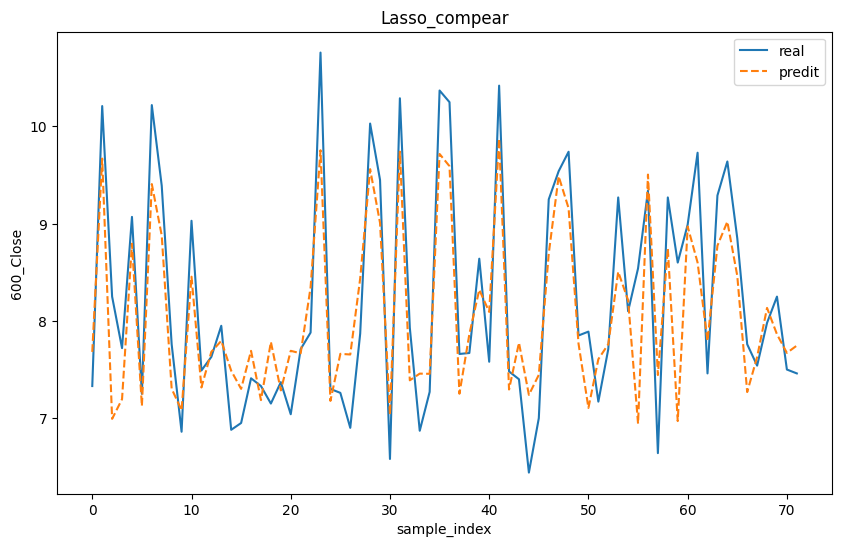

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('../input/merged_data_ALL3.csv')
df = df.dropna(axis=0,how='any')

X = df[['001_SS_Close', '399_SZ_Close', 'HIS_Close', 'IXIC_Close', 'FTSE_Close', 'JM0_Close','GDAXI_Close']]

y = df['600_Close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso回归的均方误差:", mean_squared_error(y_test, y_pred_lasso))

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='real')
plt.plot(y_pred_lasso, label='predit', linestyle='--')
plt.legend()
plt.title('Lasso_compear')
plt.xlabel('sample_index')
plt.ylabel('600_Close')
plt.show()


弹性网回归的均方误差: 0.30480928734990903


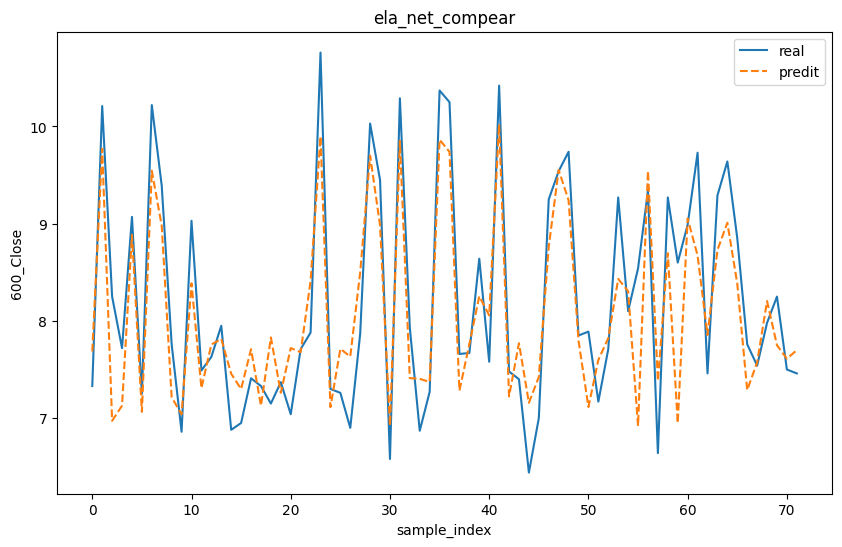

In [107]:
from sklearn.linear_model import ElasticNet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('../input/merged_data_ALL3.csv')
df = df.dropna(axis=0,how='any')
X = df[['001_SS_Close', '399_SZ_Close', 'HIS_Close', 'IXIC_Close', 'FTSE_Close', 'JM0_Close','GDAXI_Close']]
y = df['600_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ela_net = ElasticNet(alpha=0.1)
ela_net.fit(X_train, y_train)
y_pred_ela_net = ela_net.predict(X_test)

print("弹性网回归的均方误差:", mean_squared_error(y_test, y_pred_ela_net))

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='real')
plt.plot(y_pred_ela_net, label='predit', linestyle='--')
plt.legend()
plt.title('ela_net_compear')
plt.xlabel('sample_index')
plt.ylabel('600_Close')
plt.show()

Boosting的均方误差: 0.05713409761488513


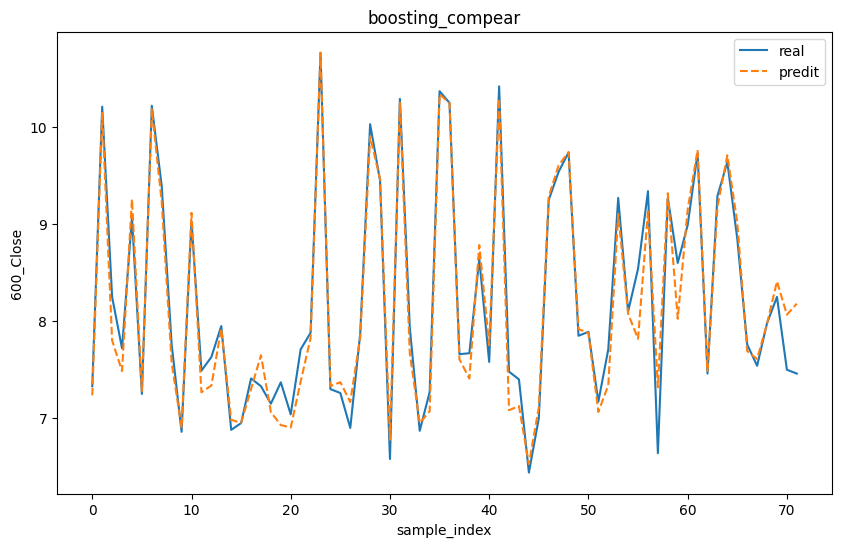

In [108]:
import xgboost as xgb

boosting_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
boosting_model.fit(X_train, y_train)
y_pred_boost = boosting_model.predict(X_test)

print("Boosting的均方误差:", mean_squared_error(y_test, y_pred_boost))
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='real')
plt.plot(y_pred_boost, label='predit', linestyle='--')
plt.legend()
plt.title('boosting_compear')
plt.xlabel('sample_index')
plt.ylabel('600_Close')
plt.show()